# Sound processing using Python
*IMPRS - Using Python for Cognitive Science (2022). This tutorial is made by Noor Seijdel and is partly based on work by [Sophie Slaats](https://www.mpi.nl/people/slaats-sophie), and on the [Pillow tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html).*

Welcome! In this module we will learn how to use Python for sound processing. Last week, we dicsussed Image Processing. This week, we will cover Sound Processing. 

After this session you will know:
- How to open and save sound files and manipulate them using the PyDub package
- How to split and splice sound files
- Filtering
- Using Praat in Python?

##### Installation and imports
Following the installation guide, 

pip install pydub



In [1]:
import os
from pydub import AudioSegment
from pydub.playback import play
from matplotlib.pyplot import plot, show

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:
# Use this line of code if you can't add ffmpeg to your PATH (as per instructions)
# doesn't hurt to add it ...
AudioSegment.converter = "P:\\workspaces\\nbl-communicativebrain\\working_data\\Noor\\teaching\IMPRS_Python\\session2b-sound-master\\ffmpeg-2022-03-24-git-28d011516b-essentials_build\\bin\\ffmpeg.exe"

# Use the os module. Works for UNIX, Windows, MacOS...
# e.g., to get working directory
os.getcwd()

# or change working directory
# os.chdir("path")


'p:\\workspaces\\nbl-communicativebrain\\working_data\\Noor\\teaching\\IMPRS_Python\\session2b-sound-master'

In [10]:
os.environ['temp']

'C:\\Users\\noosei\\AppData\\Local\\Temp'

In [11]:

# where are the sound files?
sound_folder = "P:\\workspaces\\nbl-communicativebrain\\working_data\\Noor\\teaching\\IMPRS_Python\\session2b-sound-master\\raw"

# load a sound file
sound_path = os.path.join(sound_folder, "LF_recording.wav")
print(sound_path)
sound = AudioSegment.from_wav(sound_path)

# Because of using AudioSegment, the variable "sound" is now of class "AudioSegment.
# What a class is, we will discuss later. For now, it is only necessary to know
# that a class has ATTRIBUTES. 'AudioSegment' has attributes like 'channels', 'dBFS', 'duration_seconds'.
# Let's see what that means.
print(sound.duration_seconds)

# Or access several of them in one line
# dBFS: decibels relative to full scale
# full scale; maximum possible digital level
print(sound.channels, sound.dBFS, sound.duration_seconds)


P:\workspaces\nbl-communicativebrain\working_data\Noor\teaching\IMPRS_Python\session2b-sound-master\raw\LF_recording.wav
55.0753514739229
1 -16.374883080516014 55.0753514739229


In [12]:
sound

In [13]:
# Play a sound
play(sound)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\noosei\\AppData\\Local\\Temp\\tmpmf0xxog_.wav'

In [8]:
# Visualize a sound
# A sound is a time-series, like EEG or MEG data.
# It is an array of samples with a specific value. PyDub can give us this so we can plot it:
array = sound.get_array_of_samples()

# Take a look at the array
#print(array)


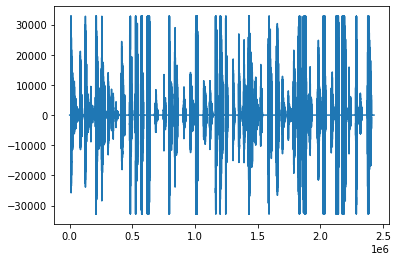

['HF_recording.wav', 'LF_recording.wav', 'NW_recording.wav']


In [31]:
# Now we plot it. If you don't run in console, you have to type show() to actually open a window with the plot.
plot(array)
show()

# Change the extension: wav to mp3
# first: split the extension and the name using os.path.splitext
# N.B.: the function os.path.split() splits the path to the folder from the filename.
filename, extension = os.path.splitext(sound_path)

# Export the sound to change the extension
new_filename = os.path.join(sound_folder, filename) + ".mp3"
sound.export(new_filename, format="mp3")

# we can also remove it again. (Make sure to close any open console windows.)
os.remove(new_filename)

# How can we make a new folder to save our sound files?
new_folder = "P:\\workspaces\\nbl-communicativebrain\\working_data\\Noor\\teaching\\IMPRS_Python\\session2b-sound-master\\tmp"
if not os.path.isdir(new_folder): # Here we check if the folder already exists! If so, we do not have to make it again. 
    os.mkdir(new_folder)

# How can we list all files in one folder?
print(os.listdir(sound_folder))

<font color='green'>**Exercise 1**</font>  store the three audio files in a new folder.


In [ ]:
# exercise: store the three audio files in a new folder.


In [32]:
# split it in two on the basis of duration
# PyDub works in milliseconds
halftime = (sound.duration_seconds / 2) * 1000
first_half = sound[:halftime]
second_half = sound[halftime:]

play(first_half)
play(second_half)



PermissionError: [Errno 13] Permission denied: 'C:\\Users\\noosei\\AppData\\Local\\Temp\\tmpobc23m1a.wav'

### Now let's have a look at slicing and splitting!

In [ ]:
# concatenate them
wrong_order = second_half + first_half

# or add silence in between
silent_time = AudioSegment.silent(duration=2000)
wrong_order_silence = second_half + silent_time + first_half

# But we can't just ADD silence -- we can also split the sound file on the basis of silence!
# Minimum silence length = 2 seconds. How many pieces should that give us?
# What happens if we change the silence threshold?
words = silence.split_on_silence(wrong_order_silence, min_silence_len=2000, silence_thresh=-50)

# How to know which silence threshold to choose?
# Try it!

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pydub

In [9]:
import os
from pydub import AudioSegment, silence
from pydub.playback import play

AudioSegment.converter = "C:\\Users\\sopsla\\AppData\\Local\\ffmpeg\\bin\\ffmpeg.exe"

# where are the sound files?
sound_folder = "C:\\Users\\sopsla\\Desktop\\session2b-sound\\raw"

# open a file
filename = "HF_recording.wav"
sound = AudioSegment.from_wav(os.path.join(sound_folder, filename))

# get duration
print(sound.duration_seconds)

# split it in two on the basis of duration
# PyDub works in milliseconds
halftime = (sound.duration_seconds / 2) * 1000
first_half = sound[:halftime]
second_half = sound[halftime:]

play(first_half)
play(second_half)

# concatenate them
wrong_order = second_half + first_half

# or add silence in between
silent_time = AudioSegment.silent(duration=2000)
wrong_order_silence = second_half + silent_time + first_half

# But we can't just ADD silence -- we can also split the sound file on the basis of silence!
# Minimum silence length = 2 seconds. How many pieces should that give us?
# What happens if we change the silence threshold?
words = silence.split_on_silence(wrong_order_silence, min_silence_len=2000, silence_thresh=-50)




How to know which silence threshold to choose?
Try it!

In [ ]:
# Try out different thresholds here, and look at the effect 

### This week's assignment

In [2]:
# We have three conditions: High Frequency (HF), Low Frequency (LF), and Non-Words (NW).
# All words for each condition are stored in one .wav file.
# Your task is to:
#       split the words on the silence
#       make sure they all have the same loudness
#       save them in a folder corresponding to their condition (folder names: HF, LF, NW)

path_to_repository = "...\\session2b-sound"  # add your own path here!

# This piece of code is here to help you.
# It reads a text file with information about the stimuli you are going to split (names & condition),
# and returns a dictionary named 'stimuli' with condition as key, and the word itself as value.
# Use this dictionary to name the files you have to save.
stimuli_info = open(os.path.join(path_to_repository, "lexdec_stimuli.txt"))
stimuli_reader = csv.reader(stimuli_info, delimiter=',')
headers = next(stimuli_reader, None)

# Create the dictionary
stimuli = {}
for stimulus in stimuli_reader:
    if stimulus[2] not in stimuli.keys():
        stimuli[stimulus[2]] = list()
    stimuli[stimulus[2]].append(stimulus[3])

# Put them in alphabetical order
for condition, words in stimuli.items():
    sort = sorted(words)
    stimuli[condition] = sort

# change the non-word condition name
stimuli["NW"] = stimuli.pop("none")

# Now you have the stimulus names. Let's take a look at the dictionary:
print(stimuli)

# YOUR CODE HERE.

# Some hints:
# 1. Where are the stimuli?
# 2. How loud do you want your stimuli to be? Store it in a variable
# 3. Where do you want to save your files? Make separate folders for the conditions.
# 4. Do you normalize the volume for the whole sequence or for separate words? Why (not)? Try it if you like :)
# 5. You can check whether your splitting worked by playing the sound, or by printing the length of the resulting list
# 6. Use the index of the word [in the list of words you get after splitting]
# to get the right text from the dictionary.
# 7. Recall you can plot your results to see what you have done.
# Good luck!

'p:\\workspaces\\nbl-communicativebrain\\working_data\\Noor\\teaching\\IMPRS_Python'